In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, optimizers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [130]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()
meta_path = r"D:\Downloads\cifar-100-python\meta"
meta = unpickle(meta_path)
fine_label = meta[b'fine_label_names']
fine_label = [label.decode('utf-8') for label in fine_label]

In [115]:
num_classes = len(fine_label)
num_classes

100

In [116]:
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

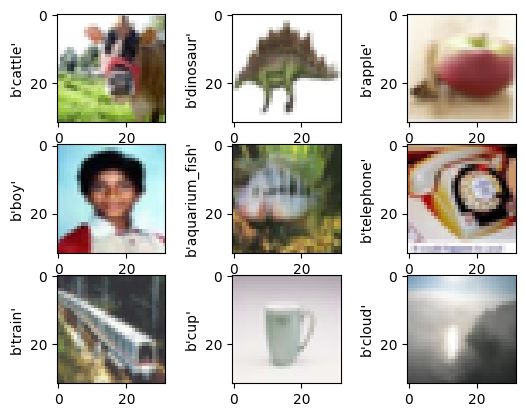

In [119]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.ylabel(fine_label[y_train[i][0]])
plt.show()

In [120]:
# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [121]:
def CNN_classification_model(input_size=x_train.shape[1:]):
    model = Sequential()
    # First block layer
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=1))
    # Second block layer
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Send feature map into a fully connected layer
    model.add(Flatten()) # Flatten first
    # Fully connected layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(.25)) # Dropout layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    # Optimizer
    opt = optimizers.Adam(learning_rate=0.0001)
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model = CNN_classification_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_22 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 29, 29, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)        18496     
                                                      

In [122]:
from tensorflow.keras.callbacks import ModelCheckpoint
tf.config.run_functions_eagerly(True)
model_name = "final_cifar100.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

# Load pretrained models
trained_weights_path = "cifar100_weights.h5"
if os.path.exists(trained_weights_path):
    model.load_weight(trained_weights_path, by_name=True)
# Train
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[model_checkpoint], verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 4.1670 - accuracy: 0.0763
Epoch 1: loss improved from inf to 4.16698, saving model to final_cifar100.h5
1563/1563 [==============================] - 252s 161ms/step - loss: 4.1670 - accuracy: 0.0763


E:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 3.6528 - accuracy: 0.1563
Epoch 2: loss improved from 4.16698 to 3.65283, saving model to final_cifar100.h5
1563/1563 [==============================] - 242s 155ms/step - loss: 3.6528 - accuracy: 0.1563
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 3.3859 - accuracy: 0.2018
Epoch 3: loss improved from 3.65283 to 3.38590, saving model to final_cifar100.h5
1563/1563 [==============================] - 241s 154ms/step - loss: 3.3859 - accuracy: 0.2018
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 3.1894 - accuracy: 0.2327
Epoch 4: loss improved from 3.38590 to 3.18941, saving model to final_cifar100.h5
1563/1563 [==============================] - 241s 154ms/step - loss: 3.1894 - accuracy: 0.2327
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 3.0257 - accuracy: 0.2614
Epoch 5: loss improved from 3.18941 to 3.02570, saving model to final_cifar10

In [123]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar100.h5')

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 11s 34ms/step - loss: 2.6132 - accuracy: 0.3511


[2.6131865978240967, 0.35109999775886536]

In [126]:
predicted = new_model.predict(x_test[0:1])

1/1 [==============================] - 0s 22ms/step


In [128]:
# Predicted label
predicted_label = np.argmax(predicted, axis=1)
predicted_label

array([68], dtype=int64)

4/4 [==============================] - 0s 21ms/step


2

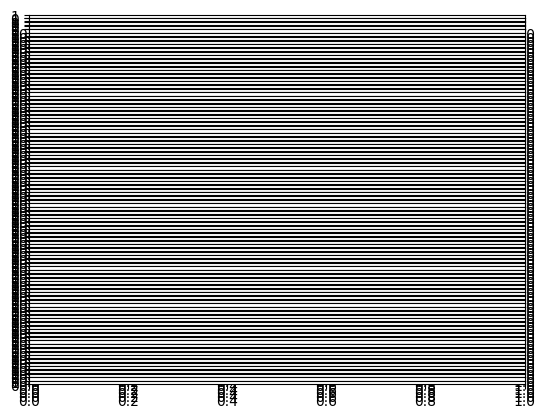

In [150]:
pred_list = []

plt.figure()
count = 0
for i in range(0,100):
    plt.subplot(100,1,i+1)
    #plt.imshow(x_train[i])
    pred = new_model.predict(x_train[0:100])
    pred_label = np.argmax(pred, axis=1)
    pred_list.append(pred_label)
    #plt.title("pred:"+fine_label[pred_label[i]]+"    actual:"+fine_label[y_test[i][0]])
    if(fine_label[pred_label[i]] == fine_label[y_test[i][0]]):
        count += 1
count
#plt.show()